<a href="https://colab.research.google.com/github/Fahim136/Australian-Energy-Dataset-Analysis-Assignment/blob/main/Australian_Energy_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Configuring git***

In [ ]:
!apt-get install git -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!git config --global user.name "Fahim Shariar"
!git config --global user.email "Shariarfahim356@gmail.com"

In [ ]:
!git clone https://github.com/Fahim136/Australian-Energy-Dataset-Analysis-Assignment.git

Cloning into 'Australian-Energy-Dataset-Analysis-Assignment'...


In [ ]:
%cd Australian-Energy-Dataset-Analysis-Assignment

/content/Australian-Energy-Dataset-Analysis-Assignment


deleted the main configuration part using remote url as it contained secret token and github raised a warning.

In [63]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


# ***Australian Energy Dataset Analysis***

In [ ]:
# Import necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The sqlite3.Cursor class is an instance using which can invoke methods that execute SQLite statements, fetch data from the result sets of the queries.

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect("/content/AUS_energy_sqlite3.db")

# Get cursor object to interact with the database
cur = conn.cursor()

In [ ]:
# Get list of tables in the database
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
print("Tables in the database:")
for table in tables:
    print(table[0])

# For each table, get the schema
for table in tables:
    table_name = table[0]
    cur.execute(f"PRAGMA table_info({table_name});")
    schema = cur.fetchall()
    print(f"\nSchema for table '{table_name}':")
    for col in schema:
        print(col)

Tables in the database:
AUS_energy

Schema for table 'AUS_energy':
(0, 'Year', 'TEXT', 0, None, 0)
(1, 'State', 'TEXT', 0, None, 0)
(2, 'Coal (PJ)', 'REAL', 0, None, 0)
(3, 'Oil (PJ)', 'REAL', 0, None, 0)
(4, 'Gas (PJ)', 'REAL', 0, None, 0)
(5, 'Renewables (PJ)', 'REAL', 0, None, 0)
(6, 'Population', 'INTEGER', 0, None, 0)
(7, 'GSP ($ million)', 'INTEGER', 0, None, 0)


The above code connects to the SQLite database and after iterating over each table in the database, it retrieves a list of tables in the database using a SQL query on the sqlite_master table, which stores metadata about the database schema.

For each table, it retrieves the schema information using the "PRAGMA table_info() " function. This function returns one row for each column in the table, containing details such as column position on the table, column name, data type, default value and constraints.

## Example of grouping, filtering and most importantly cleaning a dataset for further analysis.

In [ ]:
# Writing SQL query to extract relevant information
query = """
SELECT *
FROM AUS_energy;
"""

# Load query results into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Perform data manipulation tasks (filtering, grouping, aggregation)
# Example: filtering
# Convert the values in the 'Coal (PJ)' column to numeric type (float)
df['Coal (PJ)'] = pd.to_numeric(df['Coal (PJ)'], errors='coerce')  # Convert to float, errors='coerce' will convert non-numeric values to NaN

# Filter the DataFrame based on the condition
filtered_df = df[df['Coal (PJ)'] > 100]

# Example: grouping and aggregation
grouped_df = df.groupby('State').agg({'Coal (PJ)': 'sum'})

# Clean and pre-process the data
# Example: handling missing values
cleaned_df = df.dropna()

# Example: handling inconsistent values
cleaned_df.loc[:, 'State'] = cleaned_df['State'].apply(lambda x: x.lower())



In [ ]:
# Printing the entire DataFrame of a grouped data
print(grouped_df)

       Coal (PJ)
State           
NSW       9076.7
NT           0.0
QLD       7259.9
SA         651.7
TAS        143.3
VIC       8007.5
WA        1807.8


In [ ]:
# Print the entire DataFrame of a filtered data
print(filtered_df)

       Year State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
0   2008-09    WA      132.9     294.3     474.7             15.6     2240250   
1   2008-09   NSW      800.9     587.5     131.6             54.7     7408540   
2   2008-09   VIC      695.3     432.9     273.5             33.6     5371934   
3   2008-09   QLD      629.2     469.5     187.9             77.4     4328771   
7   2009-10    WA      125.6     290.0     474.9             14.6     2290845   
8   2009-10   NSW      771.8     638.9     148.7             63.8     7506058   
9   2009-10   VIC      688.7     448.4     263.5             36.0     5461101   
10  2009-10   QLD      547.5     466.9     195.8            107.4     4404744   
14  2010-11    WA      130.6     341.5     494.9             15.3     2353409   
15  2010-11   NSW      732.2     685.0     146.5             68.6     7586514   
16  2010-11   VIC      681.2     488.8     258.6             44.7     5537817   
17  2010-11   QLD      497.2

In [ ]:
# Print the entire DataFrame
print(cleaned_df)

# Alternatively, you can use .head() to display the first few rows
# print(cleaned_df.head())

# Or use .tail() to display the last few rows
# print(cleaned_df.tail())

       Year State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
0   2008-09    wa      132.9     294.3     474.7             15.6     2240250   
1   2008-09   nsw      800.9     587.5     131.6             54.7     7408540   
2   2008-09   vic      695.3     432.9     273.5             33.6     5371934   
3   2008-09   qld      629.2     469.5     187.9             77.4     4328771   
4   2008-09    sa       80.2     120.2     134.0             21.2     1608902   
..      ...   ...        ...       ...       ...              ...         ...   
92  2021-22   nsw      534.6     547.2     145.3            125.4     8622575   
93  2021-22   vic      410.7     410.0     237.5            105.2     6625964   
94  2021-22   qld      485.6     504.7     305.7            143.0     5320496   
95  2021-22    sa       25.9     141.6      80.2             48.3     1821200   
96  2021-22   tas        8.8      39.9       7.1             48.1      571013   

    GSP ($ million)  
0    

## ***Main Insights:***

**Trends Over Time:**
We can observe trends in energy consumption across different states over the years from 2008-09 to 2021-22.

**Regional Variances:**
There are significant differences in energy consumption between states, with some states consistently consuming more energy than others.

**Energy Source Breakdown:**
The data includes energy consumption from various sources such as coal, oil, gas, renewables, etc., providing insights into the energy mix of each state.

**Population and Economic Factors:**
The dataset also includes population and Gross State Product (GSP), which can be used to analyze the relationship between energy consumption and population/economic growth.

## ***Limitations***
**Data Granularity:**
The dataset provides annual aggregates, but finer granularity (e.g., monthly or quarterly data) could provide more insights into seasonal variations or short-term trends.

**Missing Context**:
Without additional context or external factors (e.g., climate, industrial activities, policy changes), it's challenging to fully interpret the observed trends in energy consumption.

## ***Usability and Effectiveness of Python Notebooks:***
**Interactive Analysis:**
Python notebooks allow for interactive data analysis, enabling users to explore data, run code, and visualize results in a single document.

**Reproducibility:**
Notebooks provide a transparent and reproducible workflow, making it easy to share analyses with others and replicate findings.

**Documentation and Communication:**
Notebooks serve as effective documentation tools, allowing users to combine code, analysis, and visualizations with explanatory text to communicate findings.

**Integration with Libraries and Tools:**
Python's rich ecosystem of libraries (e.g., Pandas, Matplotlib) enables seamless data manipulation, analysis, and visualization within notebooks.

## ***Role of Gen AI***

Gen AI plays a pivotal role in augmenting human intelligence, accelerating problem-solving, and enabling data-driven decision-making across various domains. However, it's crucial to approach its use with careful consideration of ethical implications and ensure collaboration between AI systems and human experts for optimal outcomes.

# **Group A**

## **Task 1: Compute and visualize the total energy consumption for each state.**

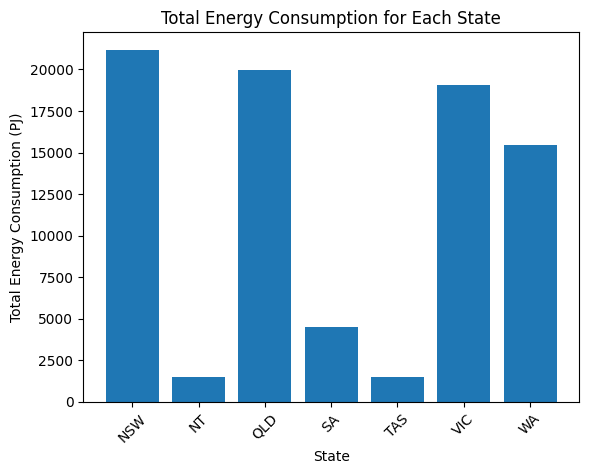

In [60]:
# Write SQL query to compute total energy consumption for each state
query = """
SELECT State, SUM("Coal (PJ)" + "Oil (PJ)" + "Gas (PJ)" + "Renewables (PJ)") AS total_energy_consumption
FROM AUS_energy
GROUP BY State;
"""

# Load query results into a Pandas DataFrame
state_energy_df = pd.read_sql_query(query, conn)

# Visualize the data
plt.bar(state_energy_df['State'], state_energy_df['total_energy_consumption'])
plt.xlabel('State')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption for Each State')
plt.xticks(rotation=45)
plt.show()

We wrote the necessary SQL query to compute the total energy consumption for each state by summing up the energy consumption from different sources (coal, oil, gas, renewables).

Grouping: We grouped the data by state.

Aggregation: We summed up the energy consumption from all sources for each state.

Then we loaded the query results into a Pandas DataFrame. Finally, we visualized the total energy consumption for each state using a bar chart.

## **Task 2: Compute and visualize the total energy consumption by fuel type.**

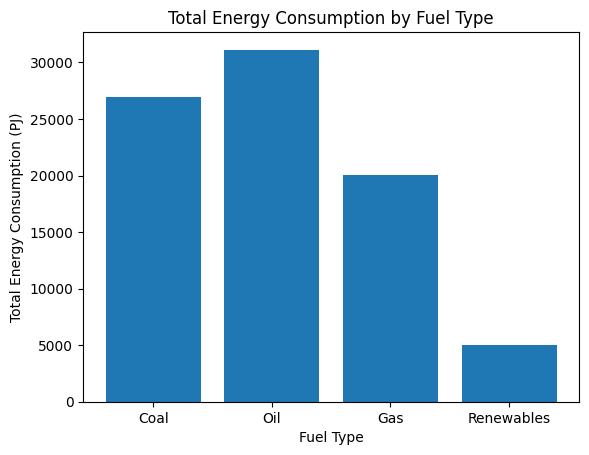

In [64]:
# Write SQL query to compute total energy consumption by fuel type
query = """
SELECT 'Coal' AS fuel_type, SUM("Coal (PJ)") AS total_energy_consumption FROM AUS_energy
UNION ALL
SELECT 'Oil' AS fuel_type, SUM("Oil (PJ)") FROM AUS_energy
UNION ALL
SELECT 'Gas' AS fuel_type, SUM("Gas (PJ)") FROM AUS_energy
UNION ALL
SELECT 'Renewables' AS fuel_type, SUM("Renewables (PJ)") FROM AUS_energy;
"""

# Load query results into a Pandas DataFrame
fuel_energy_df = pd.read_sql_query(query, conn)

# Visualize the data
plt.bar(fuel_energy_df['fuel_type'], fuel_energy_df['total_energy_consumption'])
plt.xlabel('Fuel Type')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption by Fuel Type')
plt.show()

We wrote thr SQL query to compute the total energy consumption for each fuel type by summing up the energy consumption from respective columns.

Aggregation: We summed up the energy consumption for each fuel type across all records and used the UNION ALL operator to combine the results of multiple queries.

After the query results had been loaded into a Pandas DataFrame, we visualized the total energy consumption by fuel type using a bar chart.